# **Comparing Prompt Engineering vs. RAG vs. Fine-Tuning**

## Introduction

Large Language Models (LLMs) have become an essential part of modern AI applications, powering everything from agents to automated content generation. However, simply using an off-the-shelf LLM often isn't enough to achieve optimal performance for specific use cases. To truly make good use of the power of these models, practitioners typically employ one of three main strategies: **Prompt Engineering**, **Retrieval-Augmented Generation (RAG)**, or **Fine-Tuning.**



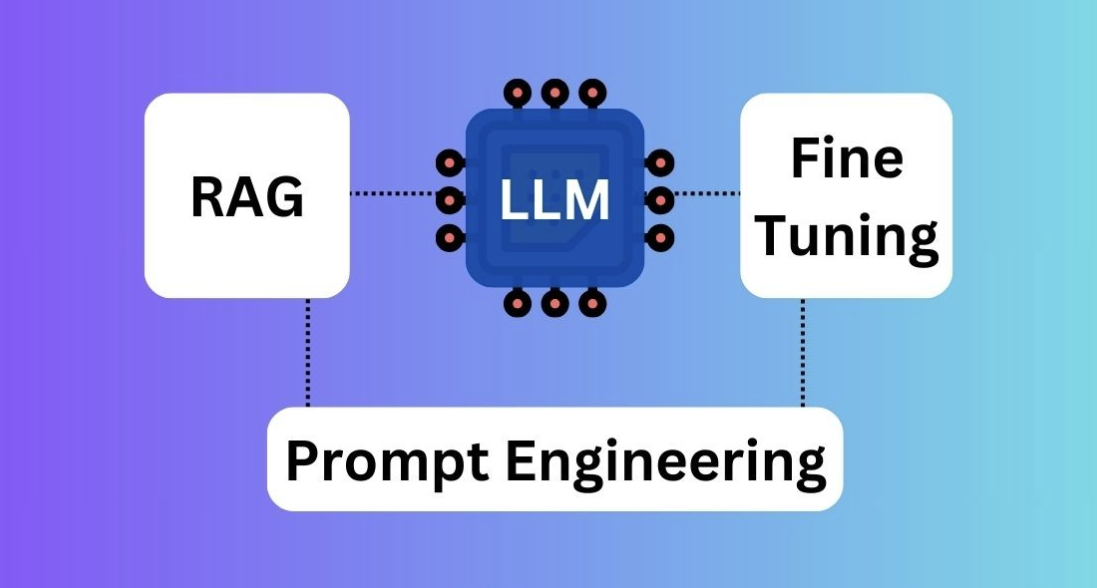

Each of these approaches has distinct advantages, trade-offs, and ideal use cases. This notebook will provide a deep dive into all three methods, comparing their effectiveness, implementation challenges, and suitability for different scenarios. By the end, you’ll have a clear understanding of when to use each technique—or even combine them for maximum impact.

## Understanding Prompt Engineering

### What exactly is Prompt Engineering?

Prompting is one of the most accessible ways to guide an LLM’s behavior without modifying its underlying architecture. Prompt engineering refers to the process of providing a carefully designed input (or prompt) to an LLM to generate a specific outputs. Think of it as a way to communicate clearly with the model, ensuring it understands what you need and delivers the right result.

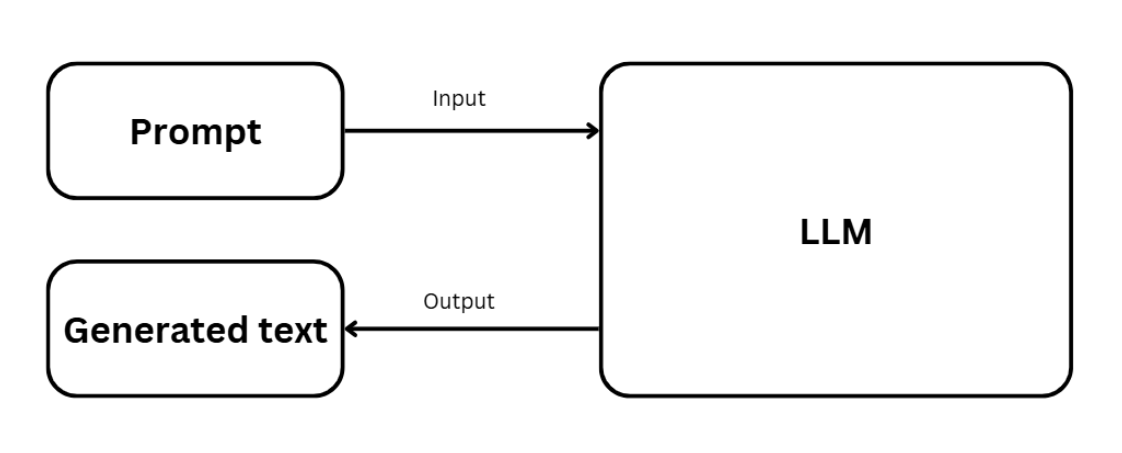

### The Issue with Zero-Shot Prompting
Zero-shot prompting refers to giving the model a task with no prior examples or context. While it demonstrates the raw capabilities of LLMs, it often leads to inconsistent or off-topic results. The model can misunderstand the intent of the prompt or generate hallucinated information, especially for ambiguous or multi-layered tasks. This happens because the model relies solely on its pretrained knowledge without any guiding context to anchor its response.


To mitigate this, researchers came up with more structured prompting techniques, each with its own approach to achieving a desired outcome.

Here are a few of them:

***We will be using The UbiAI API to call a model and try some prompting techniques.***

In [ ]:
import requests
import json
url = ""
my_token = ""


### One-Shot Prompting vs. Few-Shot Prompting
Both one-shot and few-shot prompting involve providing the model with examples before asking it to complete a task. In **one-shot prompting**, the model is given a single example, whereas **few-shot prompting** includes multiple examples, helping the model grasp the task's nuances more effectively.


For instance, if you want the model to write a formal email:

#### One-shot Prompting

In [ ]:
data = {
    "input_text": """Dear Ms. Carter,

I hope you are doing well.

I am reaching out to schedule a follow-up meeting regarding the Phoenix Initiative. Over the past few weeks, our team at LumaTech Solutions has made significant progress, and I would appreciate the opportunity to review our updates and gather your feedback before the next phase begins.

Could you please let me know your availability early next week? I am flexible and can adjust to a time that suits you best.

Thank you once again for your continued support. I look forward to our discussion.

Kind regards,
Daniel Reed""",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "Here’s an example of a formal email. Now, write one about Canceling the meeting.",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}
response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])

 Dear Ms. Carter,

I hope this message finds you well.

I am writing to inform you that I have had to rearrange my schedule for the upcoming week. Regrettably, I will not be able to proceed with our scheduled meeting regarding the Phoenix Initiative on the previously agreed-upon date.

I apologize for any inconvenience this may cause and appreciate your understanding. Our team at LumaTech Solutions has made significant progress, and I am eager to share our updates with you. I am currently in the process of rescheduling the meeting and will reach out shortly with a new date and time that works for both of us.

Thank you once again for your support and understanding. I look forward to our rescheduled discussion.

Kind regards,
Daniel Reed


In [ ]:
data = {
    "input_text": """Example 1:
Dear Ms. Carter,

I hope you are doing well.

I am reaching out to schedule a follow-up meeting regarding the Phoenix Initiative. Over the past few weeks, our team at LumaTech Solutions has made significant progress, and I would appreciate the opportunity to review our updates and gather your feedback before the next phase begins.

Could you please let me know your availability early next week? I am flexible and can adjust to a time that suits you best.

Thank you once again for your continued support. I look forward to our discussion.

Kind regards,
Daniel Reed

Example 2:
Dear Mr. Thompson,

I hope this message finds you well.

Unfortunately, due to unforeseen circumstances, I must cancel our meeting scheduled for Thursday. I apologize for any inconvenience this may cause and appreciate your understanding.

Please let me know a time that works for you to reschedule. I remain eager to discuss our ongoing collaboration and look forward to speaking with you soon.

Best regards,
Sophia Green

Example 3:
Dear Dr. Allen,

I trust you are doing well.

I wanted to inform you that I will not be able to attend our meeting tomorrow due to a scheduling conflict. I sincerely apologize for the short notice and hope we can find a convenient time to reconnect.

Please suggest a time that works for you next week, and I will do my best to accommodate.

Thank you for your understanding.

Sincerely,
Michael Chen
""",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "Here are three formal emails. Use these as a guide to write one about scheduling a new meeting for next week.",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])


 Dear Mr. or Ms. [Recipient's Last Name],

I hope this message finds you in good health and high spirits.

I am writing to propose a new meeting to discuss the ongoing project we have been collaborating on. I believe it would be beneficial to review our progress, discuss any challenges we may have encountered, and strategize for the upcoming milestones.

I propose we schedule this meeting for [specific date and time] next week. However, I am open to adjusting the date and time to accommodate your schedule. Please let me know a time that works best for you, and I will confirm the meeting details.

Thank you for your continued cooperation and support. I am looking forward to our productive meeting.

Best regards,

[Your Name]
[Your Position]
[Your Contact Information]


Few-shot prompting has proven particularly effective for tasks requiring a specific tone or format, as it helps the model generalize better, reducing errors and producing more coherent responses.

### Instruction-Based Prompting
Instruction-based prompting involves giving the model clear, explicit instructions on how to complete  task. This method is all about setting up boundaries and providing context in the prompt to guide the model toward the desired outcome.

In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "Write a 4-line poem in the style of Shakespeare about a summer day.",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}
response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])

 In golden sunbeams, a day doth unfold,
A dance of shadows, a tale untold.
Beneath the azure, a sweet, gentle sigh,
Summer's embrace, a joyous goodbye.


In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": """Write a 4-line poem about a summer day in the style of Shakespeare.
Respond ONLY in the following JSON format:

{
    "poem": "Your poem here"
}""",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])


 {
    "poem": "In golden sun's embrace, a day doth bloom, \n Laughter echoes sweetly through the air, \n Barefoot children dance upon the loam, \n Nature's symphony in every grain."
}


By providing detailed instructions in the prompt, you can ensure the model sticks to the required format or style.

### Chain-of-Thought Prompting

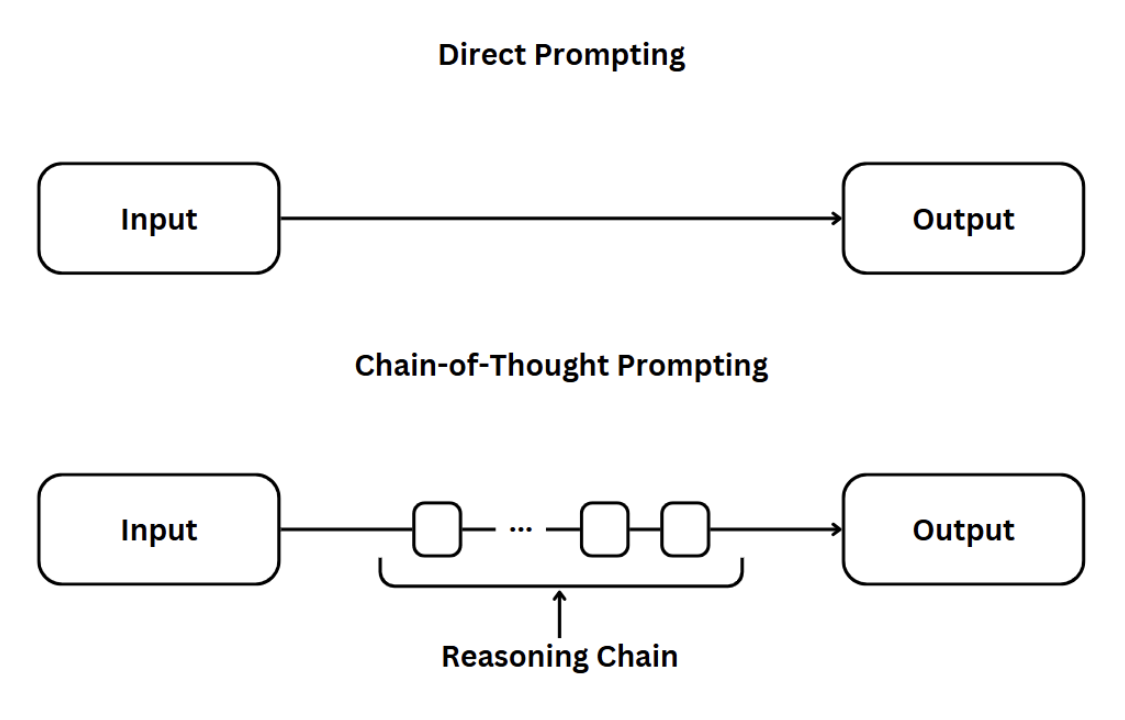

Sometimes, tasks require more than just an example, they need reasoning. Chain-of-Thought (CoT) prompting guides the model to break down complex problems step by step. Instead of letting it jumping straight to an answer, we ask the model to "thinks out loud"..

In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": """ If a farmer has 12 apples and gives 3 apples to each of his 4 friends, how many apples does he have left? Please explain your reasoning step by step. """,
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])


 Let's break this down step by step:

1. The farmer initially has 12 apples.
2. He gives 3 apples to each of his 4 friends. So, he gives a total of 3 * 4 = 12 apples to his friends.
3. When he gives away 12 apples, he no longer has any apples left because he started with 12 and gave away exactly 12.

So, the farmer has 0 apples left after giving some to his friends.


This approach breaks down the problem into manageable steps, ensuring the answer has reasoning behind it.

### Self-Consistency Prompting


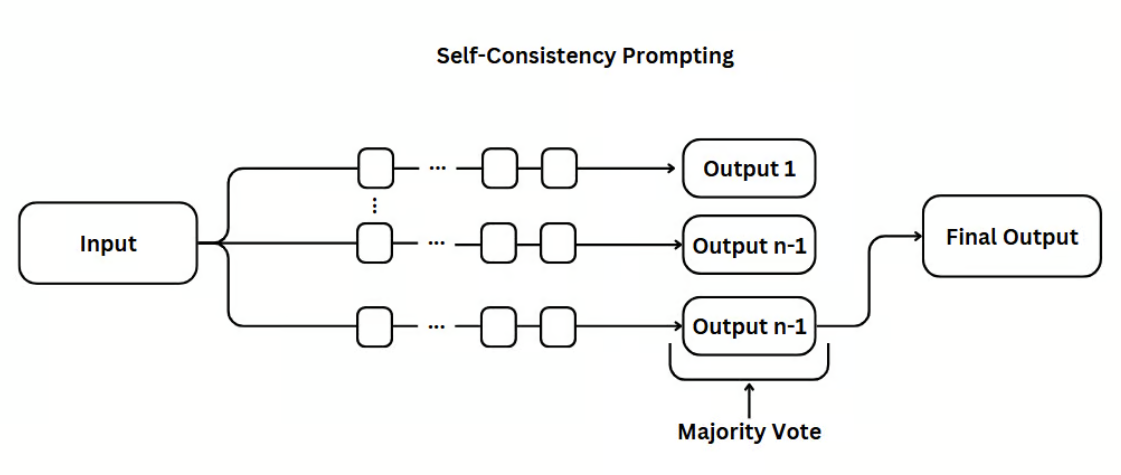

Self-consistency prompting helps improve model reliability by asking the model to generate multiple responses to the same question, then selecting the most frequent or most consistent one. This technique is especially useful for tasks where there might be ambiguity in the model's answers or when accuracy is crucial.

In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": """Please answer the following question multiple times: What’s the capital of France?""",
    "temperature": 0.7,
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])


 The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.

The capital of France is Paris.


By generating several different responses and picking the one that appears most often, self-consistency can filter out any anomalies, making the result more dependable.

***While there are many variations of prompting techniques the ones we've covered here are the most essential for effective use in real-world applications.***

 ### Importance of Hyperparameters (e.g., Temperature)

In addition to how you design your prompts, model hyperparameters also significantly affect the behavior of the AI.  

One of the most important hyperparameters is **temperature**.

#### What is Temperature?

- **Temperature** controls the **randomness** or **creativity** of the model's output.
- **Lower temperature (e.g., 0.1–0.3)** → makes the model more **deterministic**, **precise**, and **repetitive**.
- **Higher temperature (e.g., 0.7–1.0)** → makes the model more **creative**, **varied**, and sometimes even **risky**.



**In simple words:**

- **Low temp** = serious, reliable  
- **High temp** = fun, wild


In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "Write a short description of a summer day.",
    "temperature": 0.2,  # Low temperature = very stable response
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])

 A summer day is a vibrant and invigorating experience. The sun shines brightly in a clear, azure sky, casting long, warm shadows on the lush, green grass beneath. The air is filled with the sweet scent of blooming flowers, and the chirping of birds can be heard from every direction. Children laugh as they play in the cool, crystal-clear waters of a nearby lake, while adults lounge on colorful beach towels, soaking up the warmth. Ice cream trucks pass by, their melodies a familiar soundtrack of summer fun. The day is full of energy and joy, a perfect reminder of the beauty and simplicity of life during these warm, sunny months.


In [ ]:
data = {
    "input_text": "",
    "system_prompt": "You are a helpful assistant.",
    "user_prompt": "Write a short description of a summer day. make the response playful and creative with emojis",
    "temperature": 0.9,  # High temperature = more playful, surprising
    "monitor_model": True,
    "knowledge_base_ids": [],
    "session_id": "Your session id here (Optional)"
}

response = requests.post(url + my_token, json=data)
res = json.loads(response.content.decode("utf-8"))
print(res['output'])


 🌞 Sunshine ☀️ beaming down, casting a golden glow on the world! 🌟 The azure sky is as vast as a summer dream, dotted with fluffy 🐰 clouds floating by. A gentle breeze whispers through the lush 🌳 green leaves, rustling with the joy of life. 🌸 Beautiful flowers bloom in the gardens, painting a riot of colors, while the laughter of children plays like a melody in the air. 🌞 A perfect summer day, filled with warmth, wonder, and endless possibilities! 🌞🌞🌞


#### Strengths of Prompt Engineering

- **No Training Required**: Works with off-the-shelf models.
- **Quick Iteration**: Easy to test and refine prompts.
- **Low Cost**: Only requires API calls (no additional compute).

#### Limitations of Prompt Engineering

- **Limited by Pre-Training**: If the model wasn’t trained on relevant data, prompting alone won’t help.
- **Brittleness**: Small changes in phrasing can lead to vastly different outputs.
- **No Knowledge Updates**: Cannot incorporate new information post-training.


## Understanding Retrieval-Augmented Generation (RAG)

### What is Retrieval-Augmented Generation?
Retrieval-Augmented Generation (RAG) is fan AI framework that combines retrieval-based systems with the generative capabilities of large language models. This allows systems to provide more accurate, contextually relevant responses by integrating external knowledge from external sources. When a query is made, the RAG system extracts relevant information from a big dataset or knowledge base, which is then utilized to inform and guide the response generation process.

### The RAG Architecture


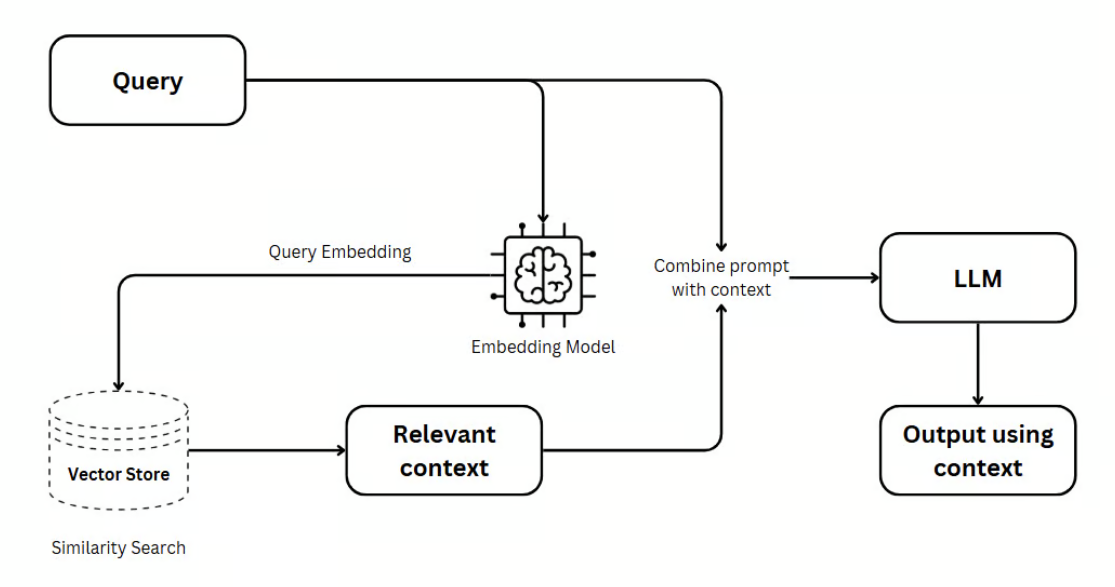

Let's break down the step-by-step process of how RAG works, focusing on each stage from data collection to the final generation of responses:


### Data Collection

The first step in setting up a RAG system is gathering the data that will be used for the knowledge base. This data serves as the foundation for the system to generate responses. Depending on the application, the data can come from various sources:

- **Customer Support Chatbot**: Information from user manuals, product specifications, FAQs, and troubleshooting guides.
- **Medical AI Application**: Research papers, clinical guidelines, and medical records.

The data needs to be **comprehensive and structured**, allowing the system to retrieve relevant information when required. Ensuring that the data is **up-to-date and accurate** is key to the success of the RAG system.



### Data Chunking

Once the data is collected, it must be processed before it can be used in the RAG system. This is where **data chunking** comes into play. Chunking refers to the process of breaking down large datasets, documents, or knowledge bases into smaller, more manageable pieces (or "chunks").

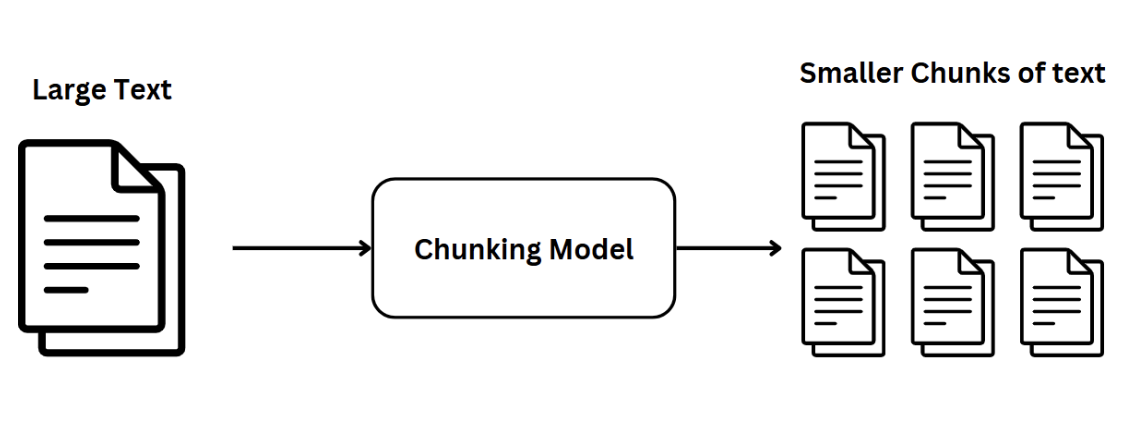

#### Why Chunking is Important:

- **Efficiency**: Processing the entire dataset at once is computationally expensive and inefficient. By breaking it into smaller chunks, the system can more quickly retrieve relevant information.
- **Output Relevance**: When data is chunked, each piece can be more precisely matched to a user query.  
  For instance, a 100-page user manual might be divided into sections based on topics, and when a user asks a specific question, only the most relevant section is retrieved.



### Document Embeddings

Once the data has been chunked, it needs to be transformed into a format that is suitable for machine processing. This is done through **document embeddings**.  
Embeddings are **numerical representations (vectors)** of text that capture the semantic meaning of the content. These embeddings are produced by models like **BERT**, or other pre-trained neural networks, and stored in a **vector database** (represented as a vector space).

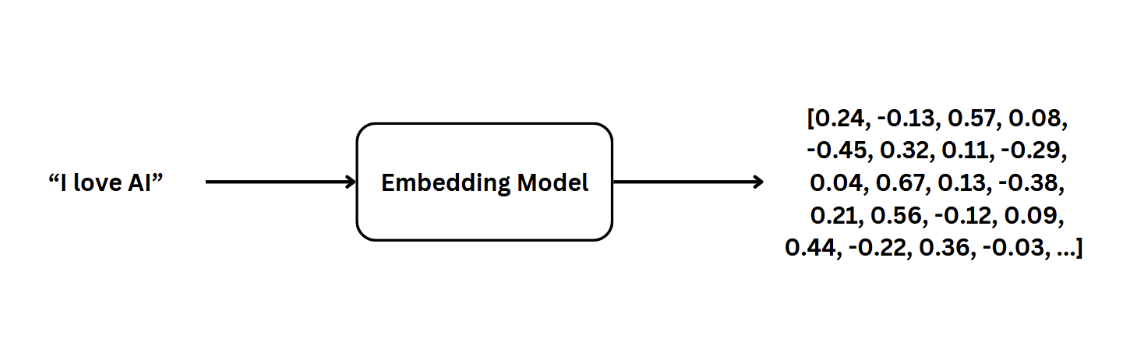

#### Why is this Needed:

- **Semantic Understanding**: Embeddings allow the system to understand the meaning of the text, rather than just matching individual words.  
  The system can recognize that "password reset" and "resetting your password" are similar, even if they use different words.
- **Efficient Matching**: Embeddings allow for fast comparison of chunks, as similar pieces of text (in terms of meaning) are represented by vectors that are close to each other in the embedding space.


Let's see how all of this is actually done:

### Settig Up our Workspace

In [ ]:
%%writefile requirements.txt
langchain
langchain-community
fastembed
chromadb
python-dotenv
langchain-groq
chainlit
fastembed
unstructured[md]

Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip uninstall nltk
!pip install nltk

In [ ]:
import shutil
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

### Document processing to extract the text as Markdown

In [ ]:
!pip install llama_parse

We will use a 600-page medical knowledge PDF to populate our vector database.

In [ ]:
import nest_asyncio
from llama_parse import LlamaParse


nest_asyncio.apply()
parser = LlamaParse(
    api_key="llx-QRjZNmoH1mBkxNX5ucXmD8nk0tkBJYlCAh1S7tnZJ42xcj5t",
    result_type="markdown",
    language="en",
    verbose=True,
    is_formatting_instruction=False,
    parsing_instruction="""
    create a markdown of the following document.
    """
)


parsed_documents = parser.load_data("/content/guideline-339-en.pdf")
with open('parsed_output.md', 'w') as f:
    for doc in parsed_documents:
        f.write(doc.text + '\n')

### Setting Up the Retrieval Mechanism

Implement a retrieval system to fetch relevant context documents based on user queries. The retrieval system acts as the "knowledge base" for the model to interact with. (In the tutorial I used chromaddb but you can pick what works best for you)

**Let's create and populate our Vector Database using The document we just Processed:**

In [ ]:
import json
import re
from huggingface_hub import InferenceClient
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.document_loaders import UnstructuredMarkdownLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
def create_and_populate_vector_database():
    """
    Creates and populates a vector database with document embeddings.
    This function only needs to be run once to set up the vector database.
    """

    markdown_path = "/content/parsed_output.md"
    loader = UnstructuredMarkdownLoader(markdown_path)
    documents = loader.load()


    text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=100)
    docs = text_splitter.split_documents(documents)


    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


    vectorstore = Chroma(
        persist_directory="./chroma_db",
        embedding_function=embed_model
    )
    vectorstore.add_documents(docs)
    vectorstore.persist()

    print('Vector database created and populated successfully!')
    return vectorstore

In [ ]:
create_and_populate_vector_database()

Let's make a function that will help us retrive from the vector database:

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import HuggingFaceEmbeddings

def query_vector_database(query):
    embed_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

    vectorstore = Chroma(
        persist_directory="./chroma_db",
        embedding_function=embed_model
    )

    results = vectorstore.similarity_search(query, k=1)

    retrieved_info = " ".join(result.page_content for result in results)

    return retrieved_info

### Building our Rag System using our UbiAI Model

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.llms.base import LLM

In [ ]:
import requests
import json
import re

def generate_response(messages, context):
    url = ""
    my_token = ""

    data = {
        "input_text": context,
        "system_prompt": "You are a smart assistant that uses the context providd to you to give accurate short answers without changing how they are written",
        "user_prompt": messages,
        "temperature": 0.7,
        "model": "mistralai/Mistral-7B-Instruct-v0.3"
    }

    response = requests.post(url + my_token, json=data)

    res = json.loads(response.content.decode("utf-8"))

    return res

In [ ]:
prompt="what are the list of indications of AMOXICILLIN oral?"
context= query_vector_database(prompt)

In [ ]:
response = generate_response(prompt,context)
print(response['output'])

 The list of indications for Amoxicillin oral (Amoxicillin/Clavulanic Acid) includes:

1. Animal bites, if antibiotic therapy or antibiotic prophylaxis is clearly indicated.
2. Second line treatment of acute otitis media and acute bacterial sinusitis, when amoxicillin alone given at high dose failed.
3. Acute uncomplicated cystitis (no systemic signs) in girls over 2 years.
4. Postpartum upper genital tract infection.
5. Parenteral to oral switch therapy in severe infections (e.g., severe pneumonia).


#### Strengths of RAG

- **Dynamic Knowledge**: Can access up-to-date or proprietary information.
- **Reduced Hallucinations**: Grounds responses in retrieved facts.
- **No Fine-Tuning Needed**: Works with pre-trained models.

#### Limitations of RAG

- **Retrieval Dependency**: Performance hinges on the quality of the knowledge base.
- **Latency**: Retrieval steps add overhead to response time.
- **Complex Setup**: Requires maintaining a searchable document database.


## Understanding Fine-Tuning

### What is Fine-Tuning?
Fine-tuning is the process of adapting a pre-trained model to perform specific tasks or solve particular problems. This technique is a crucial aspect of modern deep learning, particularly when dealing with large-scale models such as foundation models in generative AI.

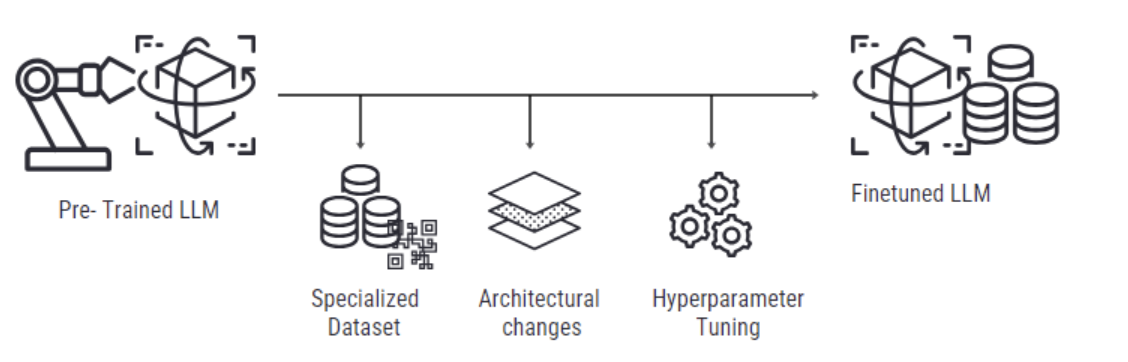

The idea behind fine-tuning is rooted in transfer learning. As we disscussed in previous chapters, rather than training a model from scratch, which requires significant computational resources and massive amounts of labeled data, fine-tuning allows us to use the knowledge a model has already learned. This makes the process more efficient and cost-effective.


Let's take a look at how it works:

**Step 1: Install Necessary Libraries**



In [ ]:
%%capture
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps xformers trl peft accelerate bitsandbytes

**Step 2: Load Pretrained Model and Tokenizer**


In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048
dtype = None
load_in_4bit = True

In [ ]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/llama-3-8b-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

**Step 3: Apply Parameter-Efficient Fine-Tuning (LoRA)**



**What is LoRA?**

LoRA (Low-Rank Adaptation) is a method that fine-tunes two smaller matrices instead of the entire weight matrix of a pre-trained LLM. These smaller matrices form a LoRA adapter, which is then applied to the original LLM. The fine-tuned adapter is much smaller in size compared to the original model, often only a small percentage of its size. During inference, this LoRA adapter is combined with the original LLM.

In our notebook, LoRA adapters are applied:

* **Target Modules:** Defines which parts of the model are fine-tuned, like query, key, and value projections.
* **LoRA Alpha & Dropout:** Control the adaptation strength and regularization.
* **Gradient Checkpointing:** Reduces memory usage during training by recomputing intermediate states.
* **Random State:** Ensures reproducibility.

This step ensure that wwe are only modifying specific parameters (around 10% of all parameters).

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",    *
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)


**Step 4: Load and Preprocess the Dataset for Fine-Tuning**

In [ ]:
chat_prompt = """
### Instruction:
{}

### Input:
{}

### Response:
{}"""

This function ensures the input data aligns with the model’s requirements, reducing inconsistencies during training.

In [ ]:
EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instruction = ""
    inputs       = examples["question"]
    outputs      = examples["answer"]
    texts = []
    for input, output in zip(inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = chat_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

In [ ]:
from datasets import load_dataset

dataset = load_dataset("BoltMonkey/psychology-question-answer", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

In [ ]:
dataset

Dataset({
    features: ['answer', 'question', 'text'],
    num_rows: 197180
})

**Step 5: Configure the Training Parameters**

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = True,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not torch.cuda.is_bf16_supported(),
        bf16 = torch.cuda.is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

**Step 6: Start Training**

In [ ]:
trainer_stats = trainer.train()

**Step 7: Perform Inference with the Fine-Tuned Model to Evaluate output**

In [ ]:
FastLanguageModel.for_inference(model) # For faster Inference

inputs = tokenizer(
[
    chat_prompt.format(
        "", # instruction - leave this blank!
        "Who is the founder of the psychoanalytic theory?", # input
        "", # output - leave this blank!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

['<|begin_of_text|>\n### Instruction:\n\n\n### Input:\nWho is the founder of the psychoanalytic theory?\n\n### Response:\nSigmund Freud is the founder of the psychoanalytic theory.<|end_of_text|>']

## Final Comparison: Prompt Engineering vs RAG vs Fine-Tuning

| **Aspect**                    | **Prompt Engineering**                                                   | **Retrieval-Augmented Generation (RAG)**                                                       | **Fine-Tuning**                                                                             |
|------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Definition**               | Designing input prompts to guide the model's behavior or response.       | Augmenting prompts with relevant external knowledge retrieved from a database.                | Updating model weights based on new domain-specific training data.                         |
| **Data Dependency**          | Minimal; relies only on prompt structure and context.                    | Requires a well-structured, indexed external knowledge base or document corpus.              | Requires large, high-quality labeled dataset for the specific domain/task.                |
| **Knowledge Source**         | Internal model knowledge (frozen post-training).                         | External documents + internal model knowledge.                                                 | Embedded into the model itself after training.                                              |
| **Latency**                  | Very low latency; fastest method.                                         | Moderate to high, depending on retrieval mechanism and database size.                         | Lowest inference latency after training, but highest latency during model training.       |
| **Cost**                     | Lowest cost (no retraining or infrastructure needed).                     | Moderate; requires search infrastructure and document indexing.                               | Highest; compute-intensive training and storage of fine-tuned models.                      |
| **Customization Level**      | Low to medium; limited by model’s base capabilities.                     | Medium to high; allows dynamic updates without retraining.                                     | Very high; allows deep task-specific and domain-specific adaptation.                       |
| **Scalability**              | Highly scalable and deployable immediately.                              | Scales with document base; search optimization needed for large-scale use.                    | Less scalable without infrastructure for training and version control.                     |
| **Use Case Examples**        | Few-shot learning, instruction following, simple Q&A, prompting tasks.    | Chatbots with external memory, enterprise search, live Q&A with up-to-date info.              | Domain-specific models (e.g., medical, legal, finance), custom generation tasks.           |
| **Maintenance**              | Easy; simply update the prompt.                                           | Medium; updating the knowledge base as new documents arrive.                                  | Hard; retraining or continual fine-tuning required for updates.                            |
| **Security & Control**       | Limited control over output precision.                                   | Moderate; control through curated knowledge base.                                              | High; behavior and output can be tightly controlled.                                       |
| **Hallucination Risk**       | High, especially with limited prompt context.                            | Lower; model references real retrieved documents.                                              | Low, if trained properly with high-quality data.                                           |
| **When to Use**              | - Quick prototyping<br>- Low-resource settings<br>- Few-shot tasks       | - Needs grounded, up-to-date info<br>- Large corpora involved<br>- Long-context problems     | - Task-specific behavior required<br>- High performance critical<br>- Secure environments |
